In [ ]:
import numpy as np 
import pandas as pd 
from sklearn import preprocessing
import matplotlib.pyplot as plt 
import seaborn as sns
import math
from scipy.stats import shapiro 
from scipy.stats import lognorm

In [ ]:
df = pd.read_csv("/Users/nattasorn/Documents/dads_6003/Group_quiz 1/dads-6003-firewall-ml/data_source/log2.csv")

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           65532 non-null  int64 
 1   Destination Port      65532 non-null  int64 
 2   NAT Source Port       65532 non-null  int64 
 3   NAT Destination Port  65532 non-null  int64 
 4   Action                65532 non-null  object
 5   Bytes                 65532 non-null  int64 
 6   Bytes Sent            65532 non-null  int64 
 7   Bytes Received        65532 non-null  int64 
 8   Packets               65532 non-null  int64 
 9   Elapsed Time (sec)    65532 non-null  int64 
 10  pkts_sent             65532 non-null  int64 
 11  pkts_received         65532 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 6.0+ MB


In [127]:
df.describe()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,65532.000000,65532.000000,65532.000000,65532.000000,6.553200e+04,6.553200e+04,6.553200e+04,6.553200e+04,65532.000000,65532.000000,65532.000000
mean,49391.969343,10577.385812,19282.972761,2671.049930,9.712395e+04,2.238580e+04,7.473815e+04,1.028660e+02,65.833577,41.399530,61.466505
std,15255.712537,18466.027039,21970.689669,9739.162278,5.618439e+06,3.828139e+06,2.463208e+06,5.133002e+03,302.461762,3218.871288,2223.332271
min,0.000000,0.000000,0.000000,0.000000,6.000000e+01,6.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
25%,49183.000000,80.000000,0.000000,0.000000,6.600000e+01,6.600000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
50%,53776.500000,445.000000,8820.500000,53.000000,1.680000e+02,9.000000e+01,7.900000e+01,2.000000e+00,15.000000,1.000000,1.000000
75%,58638.000000,15000.000000,38366.250000,443.000000,7.522500e+02,2.100000e+02,4.490000e+02,6.000000e+00,30.000000,3.000000,2.000000
max,65534.000000,65535.000000,65535.000000,65535.000000,1.269359e+09,9.484772e+08,3.208818e+08,1.036116e+06,10824.000000,747520.000000,327208.000000


In [130]:
col_lst = list(df.columns)
col_lst_noaction = col_lst
col_lst_noaction.remove('Action')
action_lst = df['Action'].unique()

print(col_lst)
print(col_lst_noaction)
print(action_lst)

['Source Port', 'Destination Port', 'NAT Source Port', 'NAT Destination Port', 'Bytes', 'Bytes Sent', 'Bytes Received', 'Packets', 'Elapsed Time (sec)', 'pkts_sent', 'pkts_received']
['Source Port', 'Destination Port', 'NAT Source Port', 'NAT Destination Port', 'Bytes', 'Bytes Sent', 'Bytes Received', 'Packets', 'Elapsed Time (sec)', 'pkts_sent', 'pkts_received']
['allow' 'drop' 'deny' 'reset-both']


In [83]:
#prep dataset
action_lst
df_allow = df.loc[df['Action'] == "allow"] 
df_drop = df.loc[df['Action'] == "drop"] 
df_deny = df.loc[df['Action'] == "deny"] 
df_reset = df.loc[df['Action'] == "reset-both"] 
df_lst = ['df_allow','df_drop','df_deny','df_reset']
df_lst


['df_allow', 'df_drop', 'df_deny', 'df_reset']

In [131]:
#Shapiro test for normal distribution
for i in col_lst_noaction:
    j = df[i]
    # print(j)
    x = shapiro(j)
    print(f'Shapiro test for "{i}" is "{x}"')



Shapiro test for "Source Port" is "ShapiroResult(statistic=0.7901273369789124, pvalue=0.0)"
Shapiro test for "Destination Port" is "ShapiroResult(statistic=0.6216827630996704, pvalue=0.0)"
Shapiro test for "NAT Source Port" is "ShapiroResult(statistic=0.8086897134780884, pvalue=0.0)"
Shapiro test for "NAT Destination Port" is "ShapiroResult(statistic=0.29973459243774414, pvalue=0.0)"
Shapiro test for "Bytes" is "ShapiroResult(statistic=0.003592252731323242, pvalue=0.0)"
Shapiro test for "Bytes Sent" is "ShapiroResult(statistic=0.0005930662155151367, pvalue=0.0)"
Shapiro test for "Bytes Received" is "ShapiroResult(statistic=0.0098915696144104, pvalue=0.0)"
Shapiro test for "Packets" is "ShapiroResult(statistic=0.004418551921844482, pvalue=0.0)"
Shapiro test for "Elapsed Time (sec)" is "ShapiroResult(statistic=0.18375468254089355, pvalue=0.0)"
Shapiro test for "pkts_sent" is "ShapiroResult(statistic=0.0019459724426269531, pvalue=0.0)"
Shapiro test for "pkts_received" is "ShapiroResult(st

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [132]:
#Shapiro test for normal distribution
for x in action_lst:
    print(x)
    rslt_df = df.loc[df['Action'] == x]
    for i in col_lst_noaction:
        j = rslt_df[i]
        # print(j)
        s = shapiro(j)
        print(f'Shapiro test for "{i}" is "{s}"')

allow
Shapiro test for "Source Port" is "ShapiroResult(statistic=0.8166460990905762, pvalue=0.0)"
Shapiro test for "Destination Port" is "ShapiroResult(statistic=0.4239497184753418, pvalue=0.0)"
Shapiro test for "NAT Source Port" is "ShapiroResult(statistic=0.9533599615097046, pvalue=0.0)"
Shapiro test for "NAT Destination Port" is "ShapiroResult(statistic=0.4193572402000427, pvalue=0.0)"
Shapiro test for "Bytes" is "ShapiroResult(statistic=0.005691707134246826, pvalue=0.0)"
Shapiro test for "Bytes Sent" is "ShapiroResult(statistic=0.0009660720825195312, pvalue=0.0)"
Shapiro test for "Bytes Received" is "ShapiroResult(statistic=0.015530526638031006, pvalue=0.0)"
Shapiro test for "Packets" is "ShapiroResult(statistic=0.006934523582458496, pvalue=0.0)"
Shapiro test for "Elapsed Time (sec)" is "ShapiroResult(statistic=0.2370414137840271, pvalue=0.0)"
Shapiro test for "pkts_sent" is "ShapiroResult(statistic=0.003078281879425049, pvalue=0.0)"
Shapiro test for "pkts_received" is "ShapiroResu

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:1813: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


In [136]:
df["Action"].value_counts()

allow         37640
deny          14987
drop          12851
reset-both       54
Name: Action, dtype: int64

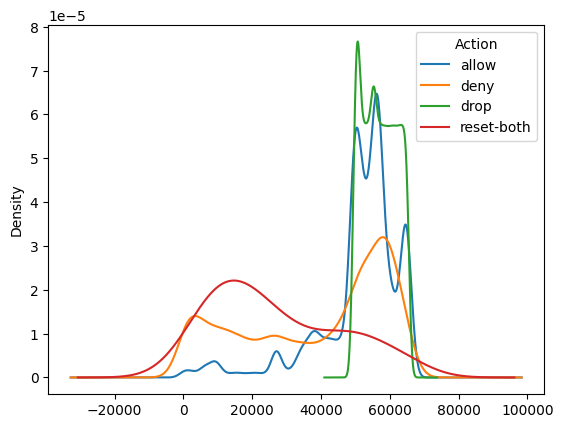

In [155]:
# Plot distribution
df.groupby('Action')['Source Port'].plot(kind='kde')
plt.legend(title='Action')

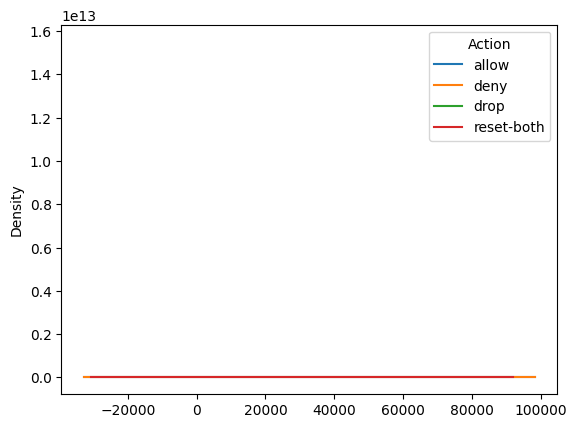

In [104]:
# Plot distribution
df.groupby('Action')['Destination Port'].plot(kind='kde')
plt.legend(title='Action')

Text(0.5, 1.0, 'Byte: Reset')

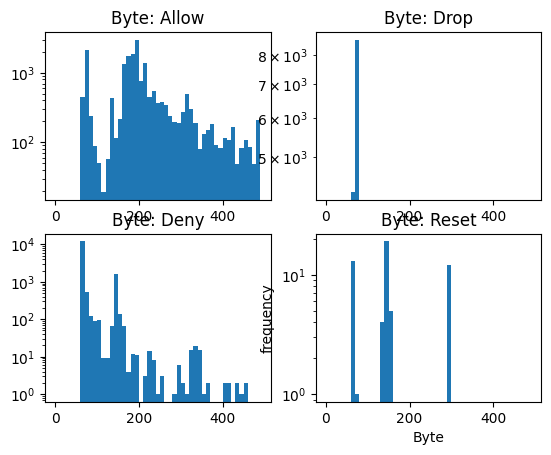

In [112]:
fig, axs = plt.subplots(2, 2)
plt.xlabel('Byte')
plt.ylabel('frequency')

axs[0, 0].hist(df_allow['Bytes'], bins=range(0,500,10), log=True)
axs[0, 0].set_title('Byte: Allow')



axs[0, 1].hist(df_drop['Bytes'], bins=range(0,500,10), log=True)
axs[0, 1].set_title('Byte: Drop')


axs[1, 0].hist(df_deny['Bytes'], bins=range(0,500,10), log=True)
axs[1, 0].set_title('Byte: Deny')


axs[1, 1].hist(df_reset['Bytes'], bins=range(0,500,10), log=True)
axs[1, 1].set_title('Byte: Reset')

Text(0.5, 1.0, 'Byte Sent: Reset')

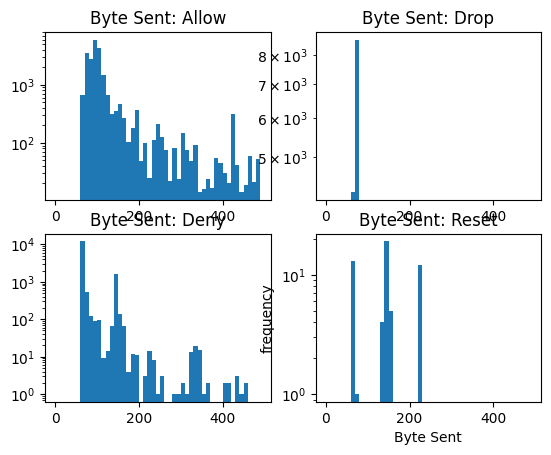

In [119]:
fig, axs = plt.subplots(2, 2)
plt.xlabel('Byte Sent')
plt.ylabel('frequency')

axs[0, 0].hist(df_allow['Bytes Sent'], bins=range(0,500,10), log=True)
axs[0, 0].set_title('Byte Sent: Allow')



axs[0, 1].hist(df_drop['Bytes Sent'], bins=range(0,500,10), log=True)
axs[0, 1].set_title('Byte Sent: Drop')


axs[1, 0].hist(df_deny['Bytes Sent'], bins=range(0,500,10), log=True)
axs[1, 0].set_title('Byte Sent: Deny')


axs[1, 1].hist(df_reset['Bytes Sent'], bins=range(0,500,10), log=True)
axs[1, 1].set_title('Byte Sent: Reset')


Text(0.5, 1.0, 'Bytes Received: Reset')

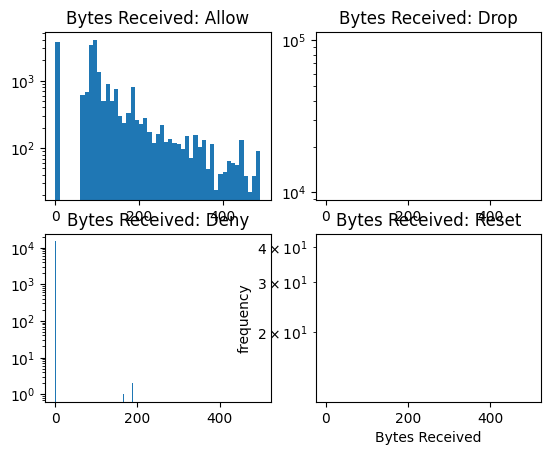

In [138]:
fig, axs = plt.subplots(2, 2)
plt.xlabel('Bytes Received')
plt.ylabel('frequency')

axs[0, 0].hist(df_allow['Bytes Received'], bins=range(0,500,10), log=True)
axs[0, 0].set_title('Bytes Received: Allow')



axs[0, 1].hist(df_drop['Bytes Received'], bins=range(0,500,1), log=True)
axs[0, 1].set_title('Bytes Received: Drop')


axs[1, 0].hist(df_deny['Bytes Received'], bins=range(0,500,1), log=True)
axs[1, 0].set_title('Bytes Received: Deny')


axs[1, 1].hist(df_reset['Bytes Received'], bins=range(0,500,1), log=True)
axs[1, 1].set_title('Bytes Received: Reset')


Text(0.5, 1.0, 'Packets: Reset')

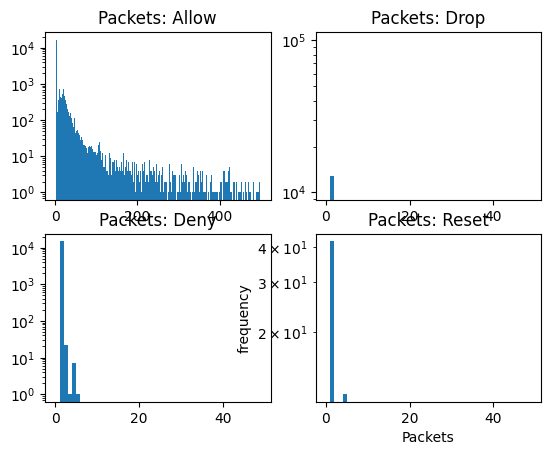

In [150]:
fig, axs = plt.subplots(2, 2)
plt.xlabel('Packets')
plt.ylabel('frequency')

axs[0, 0].hist(df_allow['Packets'], bins=range(0,500,1), log=True)
axs[0, 0].set_title('Packets: Allow')



axs[0, 1].hist(df_drop['Packets'], bins=range(0,50,1), log=True)
axs[0, 1].set_title('Packets: Drop')


axs[1, 0].hist(df_deny['Packets'], bins=range(0,50,1), log=True)
axs[1, 0].set_title('Packets: Deny')


axs[1, 1].hist(df_reset['Packets'], bins=range(0,50,1), log=True)
axs[1, 1].set_title('Packets: Reset')

Text(0.5, 1.0, 'Elapsed Time (sec): Reset')

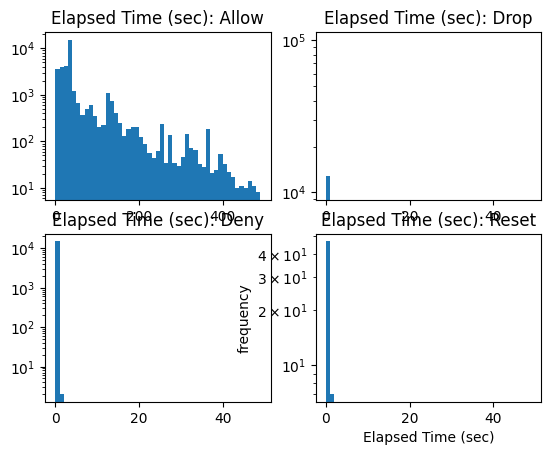

In [151]:
fig, axs = plt.subplots(2, 2)
plt.xlabel('Elapsed Time (sec)')
plt.ylabel('frequency')

axs[0, 0].hist(df_allow['Elapsed Time (sec)'], bins=range(0,500,10), log=True)
axs[0, 0].set_title('Elapsed Time (sec): Allow')



axs[0, 1].hist(df_drop['Elapsed Time (sec)'], bins=range(0,50,1), log=True)
axs[0, 1].set_title('Elapsed Time (sec): Drop')


axs[1, 0].hist(df_deny['Elapsed Time (sec)'], bins=range(0,50,1), log=True)
axs[1, 0].set_title('Elapsed Time (sec): Deny')


axs[1, 1].hist(df_reset['Elapsed Time (sec)'], bins=range(0,50,1), log=True)
axs[1, 1].set_title('Elapsed Time (sec): Reset')


Text(0.5, 1.0, 'pkts_sent: Reset')

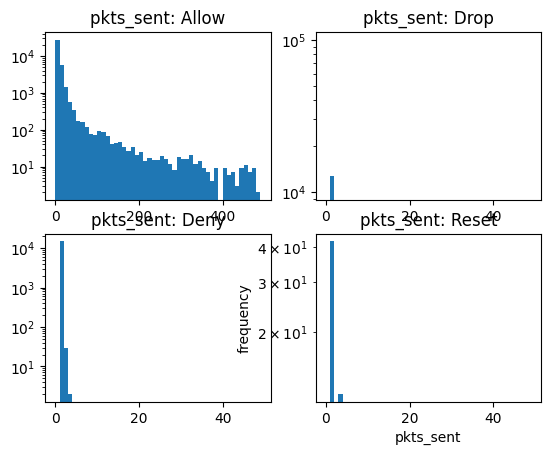

In [152]:
fig, axs = plt.subplots(2, 2)
plt.xlabel('pkts_sent')
plt.ylabel('frequency')

axs[0, 0].hist(df_allow['pkts_sent'], bins=range(0,500,10), log=True)
axs[0, 0].set_title('pkts_sent: Allow')



axs[0, 1].hist(df_drop['pkts_sent'], bins=range(0,50,1), log=True)
axs[0, 1].set_title('pkts_sent: Drop')


axs[1, 0].hist(df_deny['pkts_sent'], bins=range(0,50,1), log=True)
axs[1, 0].set_title('pkts_sent: Deny')


axs[1, 1].hist(df_reset['pkts_sent'], bins=range(0,50,1), log=True)
axs[1, 1].set_title('pkts_sent: Reset')


Text(0.5, 1.0, 'pkts_received: Reset')

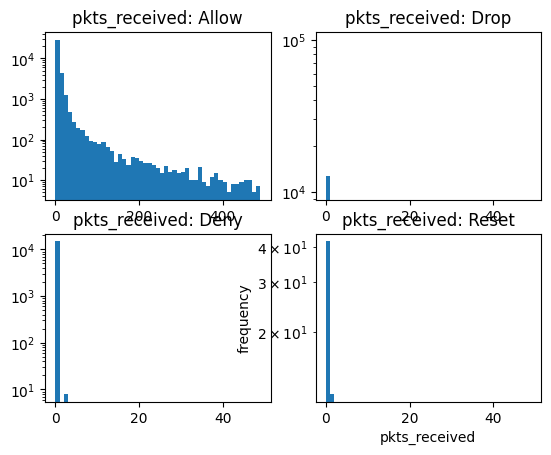

In [153]:
fig, axs = plt.subplots(2, 2)
plt.xlabel('pkts_received')
plt.ylabel('frequency')

axs[0, 0].hist(df_allow['pkts_received'], bins=range(0,500,10), log=True)
axs[0, 0].set_title('pkts_received: Allow')



axs[0, 1].hist(df_drop['pkts_received'], bins=range(0,50,1), log=True)
axs[0, 1].set_title('pkts_received: Drop')


axs[1, 0].hist(df_deny['pkts_received'], bins=range(0,50,1), log=True)
axs[1, 0].set_title('pkts_received: Deny')


axs[1, 1].hist(df_reset['pkts_received'], bins=range(0,50,1), log=True)
axs[1, 1].set_title('pkts_received: Reset')


In [113]:
print(col_lst_noaction)

['Source Port', 'Destination Port', 'NAT Source Port', 'NAT Destination Port', 'Bytes', 'Bytes Sent', 'Bytes Received', 'Packets', 'Elapsed Time (sec)', 'pkts_sent', 'pkts_received']


In [77]:
for i in col_lst:
    stats = df.groupby("Action")[i].describe()
    print()
    print(i)
    print(stats)



Source Port
              count          mean           std      min      25%      50%  \
Action                                                                       
allow       37640.0  51127.933103  12215.084883      0.0  49418.0  53759.0   
deny        14987.0  38557.289317  21098.611314      0.0  18754.0  46573.0   
drop        12851.0  57038.209244   4788.365511  49156.0  52797.0  56846.0   
reset-both     54.0  26722.425926  18382.095784   1024.0  11573.5  22207.5   

                 75%      max  
Action                         
allow       57369.25  65534.0  
deny        57355.50  65529.0  
drop        61195.00  65533.0  
reset-both  40013.50  64461.0  

Destination Port
              count          mean           std    min      25%      50%  \
Action                                                                     
allow       37640.0   4728.336265  12573.742340    0.0     53.0     80.0   
deny        14987.0  33904.072129  19337.312430    0.0  22114.0  35440.0   
drop